# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False


## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
labels=["low","much_lower","medium","much_higher","high"]
how_high=pd.qcut(app_train['AMT_INCOME_TOTAL'],5,labels=labels)
how_high=how_high.to_frame()
app_train['how_income_high']=how_high
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,how_income_high
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,much_higher
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,high
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,low
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,much_lower
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,much_lower


In [6]:
app_train.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [7]:
app_train['HOUSETYPE_MODE']=app_train['HOUSETYPE_MODE'].fillna(method="ffill")
app_train['HOUSETYPE_MODE'].value_counts()

block of flats      302102
specific housing      2938
terraced house        2471
Name: HOUSETYPE_MODE, dtype: int64

In [8]:
app_train['how_income_high']

0         much_higher
1                high
2                 low
3          much_lower
4          much_lower
             ...     
307506         medium
307507            low
307508         medium
307509    much_higher
307510         medium
Name: how_income_high, Length: 307511, dtype: object

In [9]:
app_train['HOUSETYPE_MODE'].unique()

array(['block of flats', 'terraced house', 'specific housing'],
      dtype=object)

In [10]:
group=app_train.groupby('how_income_high')
high=group.get_group("high")
much_higher=group.get_group("much_higher")
medium=group.get_group("medium")
much_lower=group.get_group("much_lower")
low=group.get_group("low")
grade=[high,much_higher,medium,much_lower,low]
medium.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,how_income_high
15,100019,0,0,M,1,1,0,157500.0,299772.0,20160.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,medium
68,100080,0,1,F,0,0,1,157500.0,450000.0,22500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,5.0,False,medium
73,100085,0,0,M,0,1,1,157500.0,755190.0,28894.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,medium
82,100097,0,0,M,1,1,0,157500.0,760225.5,30280.5,...,0,0,0.0,0.0,1.0,0.0,0.0,0.0,False,medium
110,100130,1,0,F,0,1,1,157500.0,723996.0,30802.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,medium


In [11]:
#terraced house的持有率隨著salary的高低呈現反向成長
empty=dict()
for i in grade:
    high=i['how_income_high'].unique()[0]
    fre=i['HOUSETYPE_MODE'].value_counts()
    mension_rate=fre['terraced house']/fre.sum()
    empty[high]=mension_rate
empty

# high_num=high['HOUSETYPE_MODE'].value_counts()
# mension_rate=high_num['terraced house']/high_num.sum()
# much_higher_num=much_higher_num['terraced house']


{'high': 0.006982469544547731,
 'much_higher': 0.007932408989180672,
 'medium': 0.008095224663639185,
 'much_lower': 0.008244321097066094,
 'low': 0.008622449780904965}

In [34]:
count=[]
for i in grade:
    print(i['HOUSETYPE_MODE'].value_counts())
    count.append(i['HOUSETYPE_MODE'].value_counts())


block of flats      46421
specific housing      368
terraced house        329
Name: HOUSETYPE_MODE, dtype: int64
block of flats      74213
specific housing      701
terraced house        599
Name: HOUSETYPE_MODE, dtype: int64
block of flats      34800
specific housing      366
terraced house        287
Name: HOUSETYPE_MODE, dtype: int64
block of flats      84193
specific housing      856
terraced house        707
Name: HOUSETYPE_MODE, dtype: int64
block of flats      62475
specific housing      647
terraced house        549
Name: HOUSETYPE_MODE, dtype: int64


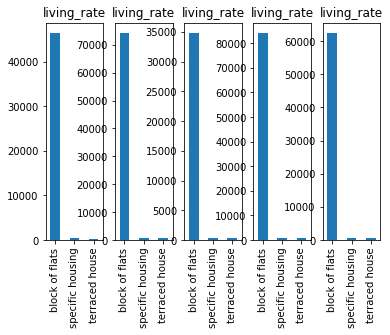

In [55]:
fig,axes=plt.subplots(1,5)
# axes[0].hist(grade[0]['HOUSETYPE_MODE'].value_counts())
for i in range(len(count)):
    count[i].plot.bar(ax=axes[i],figsize=(6,4),title="living_rate")
    

# 比較教育程度與薪水高低的程度

In [62]:
app_train['NAME_EDUCATION_TYPE'].head()
app_train['NAME_EDUCATION_TYPE'].value_counts()


Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [63]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
total_range=pd.qcut(app_train['AMT_INCOME_TOTAL'],[0,0.25,0.5,0.75,1])
app_train['total_range']=total_range
app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,total_range
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,"(147150.0, 202500.0]"
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(202500.0, 117000000.0]"
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(25649.999, 112500.0]"
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,"(112500.0, 147150.0]"
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(112500.0, 147150.0]"
5,100008,0,0,M,0,1,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,"(25649.999, 112500.0]"
6,100009,0,0,F,1,1,1,171000.0,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,"(147150.0, 202500.0]"
7,100010,0,0,M,1,1,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(202500.0, 117000000.0]"
8,100011,0,0,F,0,1,0,112500.0,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,"(25649.999, 112500.0]"
9,100012,0,1,M,0,1,0,135000.0,405000.0,20250.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,"(112500.0, 147150.0]"


In [119]:
group=app_train.groupby('NAME_EDUCATION_TYPE')
NAME_EDUCATION_TYPE=app_train.groupby('NAME_EDUCATION_TYPE').size().index
group.groups.keys()

dict_keys(['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special'])

In [140]:
education_salary=group['total_range'].apply(lambda gl:gl.sort_values())
every_salary={}
for i in group.groups.keys():
    every_salary[i]=education_salary[i].value_counts()
every_salary.keys()

dict_keys(['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special'])

[83 38 27 16]
[28328 21108 14518 10909]
[2966 2877 2604 1830]
[1993  791  653  379]
[81436 57310 39871 39774]


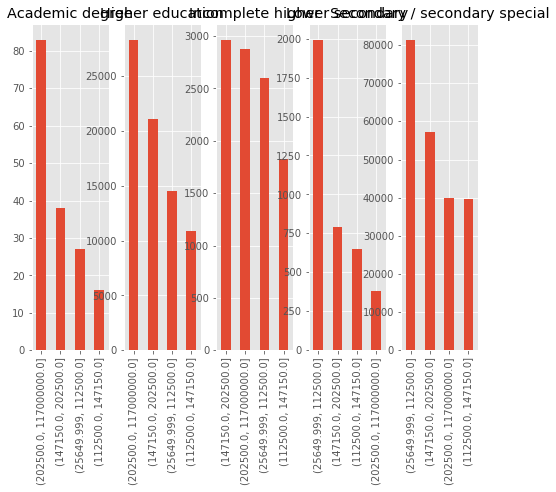

In [185]:
fig,ax=plt.subplots(1,len(every_salary.values()),figsize=(8,6))

for a,b in every_salary.items():
    b.plot.bar(ax=ax[list(every_salary.keys()).index(a)],title=a)
    print(b.values)
#     ax[list(every_salary.keys()).index(a)].plot.bar(b,title=a)
# ax.plot(x=app_train['total_range'],y=app_train['NAME_EDUCATION_TYPE'])

In [162]:
every_salary.items()

dict_items([('Academic degree', (202500.0, 117000000.0]    83
(147150.0, 202500.0]       38
(25649.999, 112500.0]      27
(112500.0, 147150.0]       16
Name: total_range, dtype: int64), ('Higher education', (202500.0, 117000000.0]    28328
(147150.0, 202500.0]       21108
(25649.999, 112500.0]      14518
(112500.0, 147150.0]       10909
Name: total_range, dtype: int64), ('Incomplete higher', (147150.0, 202500.0]       2966
(202500.0, 117000000.0]    2877
(25649.999, 112500.0]      2604
(112500.0, 147150.0]       1830
Name: total_range, dtype: int64), ('Lower secondary', (25649.999, 112500.0]      1993
(147150.0, 202500.0]        791
(112500.0, 147150.0]        653
(202500.0, 117000000.0]     379
Name: total_range, dtype: int64), ('Secondary / secondary special', (25649.999, 112500.0]      81436
(147150.0, 202500.0]       57310
(202500.0, 117000000.0]    39871
(112500.0, 147150.0]       39774
Name: total_range, dtype: int64)])

In [174]:
plt.figure(figsize = (8, 8))
for a,b in every_salary.items():
    print(b.index.tolist())
    print(b.values)
# px = age_data['YEARS_BINNED']
# py = age_data['TARGET']
# sns.barplot(px, py)

# # Plot labeling
# plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
# plt.title('Failure to Repay by Age Group');

[Interval(202500.0, 117000000.0, closed='right'), Interval(147150.0, 202500.0, closed='right'), Interval(25649.999, 112500.0, closed='right'), Interval(112500.0, 147150.0, closed='right')]
[83 38 27 16]
[Interval(202500.0, 117000000.0, closed='right'), Interval(147150.0, 202500.0, closed='right'), Interval(25649.999, 112500.0, closed='right'), Interval(112500.0, 147150.0, closed='right')]
[28328 21108 14518 10909]
[Interval(147150.0, 202500.0, closed='right'), Interval(202500.0, 117000000.0, closed='right'), Interval(25649.999, 112500.0, closed='right'), Interval(112500.0, 147150.0, closed='right')]
[2966 2877 2604 1830]
[Interval(25649.999, 112500.0, closed='right'), Interval(147150.0, 202500.0, closed='right'), Interval(112500.0, 147150.0, closed='right'), Interval(202500.0, 117000000.0, closed='right')]
[1993  791  653  379]
[Interval(25649.999, 112500.0, closed='right'), Interval(147150.0, 202500.0, closed='right'), Interval(202500.0, 117000000.0, closed='right'), Interval(112500.0

<Figure size 576x576 with 0 Axes>

In [154]:
education_salary

NAME_EDUCATION_TYPE                  
Academic degree                71919       (25649.999, 112500.0]
                               287290      (25649.999, 112500.0]
                               55754       (25649.999, 112500.0]
                               287160      (25649.999, 112500.0]
                               286257      (25649.999, 112500.0]
                                                  ...           
Secondary / secondary special  221183    (202500.0, 117000000.0]
                               83410     (202500.0, 117000000.0]
                               83409     (202500.0, 117000000.0]
                               83424     (202500.0, 117000000.0]
                               199210    (202500.0, 117000000.0]
Name: total_range, Length: 307511, dtype: category
Categories (4, interval[float64]): [(25649.999, 112500.0] < (112500.0, 147150.0] < (147150.0, 202500.0] < (202500.0, 117000000.0]]

In [157]:
cor=app_train.corr()['AMT_INCOME_TOTAL']


OWN_CAR_AGE                   -0.117273
REGION_RATING_CLIENT_W_CITY   -0.091735
REGION_RATING_CLIENT          -0.085465
DAYS_EMPLOYED                 -0.064223
FLAG_DOCUMENT_6               -0.045878
                                 ...   
FLOORSMIN_AVG                  0.139860
AMT_CREDIT                     0.156870
AMT_GOODS_PRICE                0.159610
AMT_ANNUITY                    0.191657
AMT_INCOME_TOTAL               1.000000
Name: AMT_INCOME_TOTAL, Length: 109, dtype: float64

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')


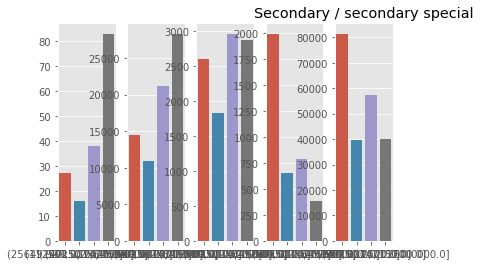

In [186]:
fig,axes=plt.subplots(1,5)
for a,b in every_salary.items():
#     for x,y in zip(b.index.tolist(),b.values):
    sns.barplot(b.index,b.values,ax=axes[list(every_salary.keys()).index(a)])
    plt.title(a)


In [179]:
for a,b in every_salary.items():
    for x,y in zip(b.index.tolist(),b.values):
           print(x,y)

(202500.0, 117000000.0] 83
(147150.0, 202500.0] 38
(25649.999, 112500.0] 27
(112500.0, 147150.0] 16
(202500.0, 117000000.0] 28328
(147150.0, 202500.0] 21108
(25649.999, 112500.0] 14518
(112500.0, 147150.0] 10909
(147150.0, 202500.0] 2966
(202500.0, 117000000.0] 2877
(25649.999, 112500.0] 2604
(112500.0, 147150.0] 1830
(25649.999, 112500.0] 1993
(147150.0, 202500.0] 791
(112500.0, 147150.0] 653
(202500.0, 117000000.0] 379
(25649.999, 112500.0] 81436
(147150.0, 202500.0] 57310
(202500.0, 117000000.0] 39871
(112500.0, 147150.0] 39774
